16×16 Matrix{Float64}:
  1.20472     -0.206124     0.137615    …  -0.00151937  0.0  0.0  0.0  0.0
 -0.206124     1.20472     -0.206124       -0.0343741   0.0  0.0  0.0  0.0
  0.137615    -0.206124     1.20472        -0.00151937  0.0  0.0  0.0  0.0
 -0.206124     0.137615    -0.206124       -0.0444995   0.0  0.0  0.0  0.0
 -0.139346    -0.0169535   -0.0667865      -0.0169535   0.0  0.0  0.0  0.0
 -0.0169535   -0.139346    -0.0169535   …  -0.0667865   0.0  0.0  0.0  0.0
 -0.0667865   -0.0169535   -0.139346       -0.0169535   0.0  0.0  0.0  0.0
 -0.0169535   -0.0667865   -0.0169535      -0.139346    0.0  0.0  0.0  0.0
 -0.0444995   -0.00151937  -0.0343741      -0.206124    0.0  0.0  0.0  0.0
 -0.00151937  -0.0444995   -0.00151937      0.137615    0.0  0.0  0.0  0.0
 -0.0343741   -0.00151937  -0.0444995   …  -0.206124    0.0  0.0  0.0  0.0
 -0.00151937  -0.0343741   -0.00151937      1.20472     0.0  0.0  0.0  0.0
  0.0          0.0          0.0             0.0         0.0  0.0  0.0  0.0
  

## Free Fermion with orbital field
### Benchmark for some static observables

In [1]:
include("subfun.jl")

fftvector (generic function with 1 method)

In [33]:
H = getH(pi,8,8,false,false)
@show H
eigenvalues, eigenvectors = eigen(H)
@show sort(abs.(eigenvalues))


64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 2.342855787650524
 2.3813188478164045
 2.401541698336632
 2.4364493528893747
 2.4577609072219144
 2.666614935206523
 2.7096748149531265
 2.810585840301455
 2.952184656934428

In [34]:
function meshgrid(x, y)
    X = [i for i in x, j in y]
    Y = [j for i in x, j in y]
    return X, Y
end
kx = (1:Lx)*pi/(Lx+1)
ky = (1:Ly)*pi/(Ly+1)
kx,ky = meshgrid(kx,ky)
sort(reshape(2*sqrt.(cos.(kx).^2+cos.(ky).^2),Lx*Ly))


16-element Vector{Float64}:
 0.8740320488976419
 0.8740320488976421
 0.8740320488976421
 0.8740320488976422
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 2.288245611270737
 2.288245611270737
 2.288245611270737
 2.288245611270737

In [1]:
L = 8
g = 1
t = 1
Lx = L
Ly = L
PBCx = true
PBCy = true
N = Lx*Ly
beta = L

H = getH(g*sqrt(2/(Lx*Ly)),Lx,Ly,PBCx,PBCy)

E,ev = eigen(H)
idxs = findall(x -> x < 0, real(E))
@show E0 = sum(E[idxs])*2/N
ET = sum((ones(N,1)-inv.(ones(N,1) .+exp.(-beta*E))) .* E)
@show ET*2/N
@show H

B = exp(-beta*H)


#### fluctuation field ####
# tau = 0.1
# Lt = beta/tau
# B = 1
# # H = zeros(N,N)+0im* zeros(N,N)
# for tt in 1:Lt
#     H = zeros(N,N)+0im* zeros(N,N)
#     # X = rand()
#     X = 1
#     for x in 1:Lx
#         for y in 1:Ly
#             H[mapto1D(x,y),mapto1D(rem(x,Lx)+1,y)] = -t*exp(1im*g*sqrt(2/(Lx*Ly))*y*X)
#             H[mapto1D(x,y),mapto1D(x,rem(y,Ly)+1)] = -t
#             if x==Lx && !PBCx
#                 H[mapto1D(x,y),mapto1D(rem(x,Lx)+1,y)] = 0
#             end
#             if y==Ly && !PBCy
#                 H[mapto1D(x,y),mapto1D(x,rem(y,Ly)+1)] = 0
#             end
            
#         end
#     end
#     H = H + transpose(conj(H))
#     # @show tt,   H
#     B = B*exp(-tau*H)
# end



G = inv(I(N)+B)
G0t = G - I(N) 

UndefVarError: UndefVarError: `getH` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:



### cal average G 
AverageG = zeros(Complex,Lx,Ly)
for rx = 0:Lx-1
    for ry = 0:Ly-1
        for x = 1:Lx
            for y = 1:Ly
            AverageG[rx+1,ry+1] += G[mapto1D(x,y),mapto1D(rem(x+rx-1,Lx)+1,rem(y+ry-1,Ly)+1)]
            end
        end
    end
end

@show AverageG/N

## density density correlation ni nj
Gd = zeros(Complex,N,N)
for x1 = 1:Lx
    for y1 = 1:Ly
        i = mapto1D(x1,y1)
        for x2 = 1:Lx
            for y2 = 1:Ly
                j = mapto1D(x2,y2)
                Gd[i,j] = 4*(1-G[i,i]-G[j,j]+G[i,i]*G[j,j]) - 2*G[i,j]*G0t[j,i]
            end
        end
    end
end
@show Gd


#### current-current correlation ####
Gcrt1 = zeros(Complex,N,N)
Gcrt2 = zeros(Complex,N,N)

Gbd1 = zeros(Complex,N,N)
Gbd2 = zeros(Complex,N,N)


ty = t
for x1 = 1:Lx
    for y1 = 1:Ly
        ## bond (x1,y1)  (x1+1,y1)
        i = mapto1D(x1,y1)
        ipa = mapto1D(rem(x1,Lx)+1,y1)
        ipa2 = mapto1D(x1,rem(y1,Ly)+1)

        ti = t*exp(1im*g*sqrt(2/(Lx*Ly))*(y1-1))
        for x2 = 1:Lx
            for y2 = 1:Ly
                    ## bond (x2,y2)  (x2+1,y2)
                j = mapto1D(x2,y2)
                jpa = mapto1D(rem(x2,Lx)+1,y2)
                jpa2 = mapto1D(x2,rem(y2,Ly)+1)
                

                tj = t*exp(1im*g*sqrt(2/(Lx*Ly))*(y2-1))

                Gcrt1[i,j] = 4 * (-  ti*tj*G[ipa,i]*G[jpa,j] - conj(ti*tj)*G[i,ipa]*G[j,jpa] + ti*conj(tj)*G[ipa,i]*G[j,jpa] + conj(ti)*tj*G[i,ipa]*G[jpa,j]) + 
                2 * (ti*tj* G[ipa,j]*G0t[jpa,i] + conj(ti*tj)*G[i,jpa]*G0t[j,ipa] - ti*conj(tj)*G[ipa,jpa]*G0t[j,i] - conj(ti)*tj* G[i,j]*G0t[jpa,ipa])

                if !PBCx && (x1==Lx || x2==Lx)
                    Gcrt1[i,j] = 0
                end
                
                # tj = t*exp(1im*g*sqrt(2/(Lx*Ly))*y2)
                ## bond (x2,y2)  (x2+1,y2)
                Gcrt2[i,j] = 4 * (- G[ipa2,i]*G[jpa2,j] - G[i,ipa2]*G[j,jpa2] + G[ipa2,i]*G[j,jpa2] + G[i,ipa2]*G[jpa2,j]) + 
                2 * (G[ipa2,j]*G0t[jpa2,i] + G[i,jpa2]*G0t[j,ipa2] - G[ipa2,jpa2]*G0t[j,i] - G[i,j]*G0t[jpa2,ipa2])
            
                if !PBCy && (y1==Ly || y2==Ly)
                    Gcrt2[i,j] = 0
                end

            end
        end

    end
end
AverageGcrt1 = zeros(Complex,Lx,Ly)
AverageGcrt2 = zeros(Complex,Lx,Ly)
for rx = 0:Lx-1
    for ry = 0:Ly-1
        for x = 1:Lx
            for y = 1:Ly
                AverageGcrt1[rx+1,ry+1] += Gcrt1[mapto1D(x,y),mapto1D(rem(x+rx-1,Lx)+1,rem(y+ry-1,Ly)+1)]
                AverageGcrt2[rx+1,ry+1] += Gcrt2[mapto1D(x,y),mapto1D(rem(x+rx-1,Lx)+1,rem(y+ry-1,Ly)+1)]
            end
        end
    end
end
@show AverageGcrt1/N
@show AverageGcrt2/N
@show Gcrt1
@show Gcrt2
@show G


-(imag(Ak)) = [0.012492192379762741 0.024968789013732978 0.012492192379763237 0.008329862557266317 0.012492192379764856 0.024968789013734095 0.01249219237976593 0.008329862557269219; 0.02496878901373259 19.99999999999961 0.024968789013732024 0.012492192379762616 0.024968789013735875 19.999999999999613 0.024968789013739265 0.012492192379762682; 0.012492192379763211 0.02496878901373214 0.012492192379763742 0.008329862557268088 0.01249219237976768 0.024968789013732527 0.012492192379769422 0.008329862557266043; 0.008329862557266452 0.012492192379762459 0.008329862557268163 0.00624804748516113 0.008329862557268598 0.012492192379762632 0.008329862557266057 0.006248047485161034; 0.01249219237976483 0.02496878901373572 0.012492192379767699 0.008329862557268617 0.012492192379763756 0.02496878901373375 0.012492192379765923 0.008329862557266862; 0.024968789013734567 19.999999999999755 0.024968789013732024 0.012492192379762658 0.024968789013733127 19.999999999999755 0.02496878901373343 0.012492192

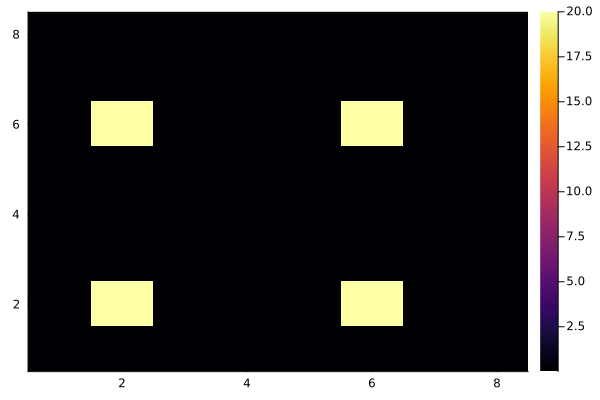

In [3]:
include("subfun.jl")
Lx = 8
Ly = 8
N = Lx*Ly
H = getH(pi,Lx,Ly,true,true)
# @show H
Ak = calFS(H,0)
@show -imag(Ak)
using Plots
heatmap(-imag(Ak))
# title!("g = "*string(g))


In [ ]:

using Plots
# PBCx = true
# PBCy = true
# L = 8
H = getH(pi,Lx,Ly,1,1)
@show size(H)
energy, ldos = calculate_ldos(H,3)
plot(energy,ldos)
eigenvalues, eigenvectors = eigen(H)
(eigenvalues)
# eigenvalues

using DelimitedFiles

writedlm("phy.txt", eigenvalues)


MethodError: MethodError: no method matching !(::Int64)
The function `!` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  !(!Matched::Missing)
   @ Base missing.jl:101
  !(!Matched::Bool)
   @ Base bool.jl:35
  !(!Matched::ComposedFunction{typeof(!)})
   @ Base operators.jl:1108
  ...


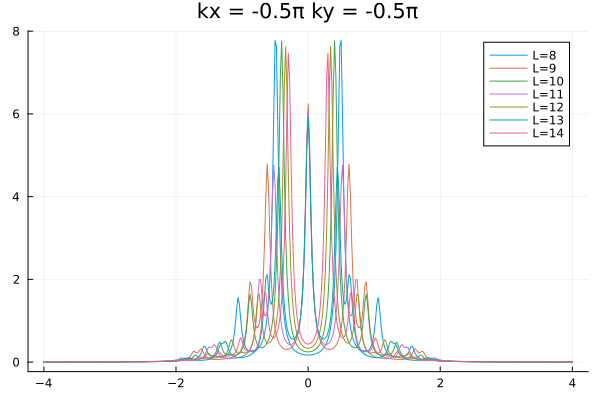

In [24]:
include("subfun.jl")
using Printf
using Plots

# closeall()
plot()
for L in 8:1:14
Lx = L
Ly = L
N = Lx*Ly

U = zeros(ComplexF64,N,N)
H = getH(pi,Lx,Ly,false,false)

for kx in 1:Lx
    for ky in 1:Ly
        U[:,mapto1D(kx,ky)] = fftvector(kx*2*pi/Lx,ky*2*pi/Ly,Lx,Ly)
    end
end

# Hk = conj(transpose(U))*H*U

w = 0
eta = 0.05

Ens, evs = eigen(H)

# eA = Diagonal(1 ./((w+1im*eta).-Ens))
# G = evs*(eA*transpose(conj(evs)));
# heatmap(-reshape(diag(imag(G)),Lx,Ly))

ws = -4:0.02:4
A = zeros(size(ws))

kx = -0.5
ky = -0.5
for n in 1:size(ws,1)
    # @show n
    w = ws[n]
    # eA = Diagonal(1 ./((w+1im*eta).-Ens))
    # G = evs*(eA*transpose(conj(evs)))

    G = zeros(size(Ens,1),size(Ens,1))
    for ii in 1:size(Ens,1)
        G += evs[:,ii]*conj(transpose(evs[:,ii]))./((w+1im*eta)-Ens[ii])
    end
    # A[n] = imag( -conj(transpose(fftvector(pi/2,pi/2,Lx,Ly)))*G*fftvector(pi/2,pi/2,Lx,Ly) )
    # A[n] = imag( -conj(transpose(fftvector(-0.6*pi,-0.6*pi,Lx,Ly)))*G*fftvector(-0.6*pi,-0.6*pi,Lx,Ly) )
    A[n] = imag( -conj(transpose(fftvector(kx*pi,ky*pi,Lx,Ly;pbc=false)))* G *fftvector(kx*pi,ky*pi,Lx,Ly;pbc=false) )
    # A[n] = imag( -(transpose(fftvector(kx*pi,ky*pi,Lx,Ly)))* G * conj(fftvector(kx*pi,ky*pi,Lx,Ly)) )
end
# @show size(fftvector(kx,ky,Lx,Ly))
plot!(ws,A,label = "L="*string(L))
# legend!("L="*string(L))
# title!("kx =%.1f ky = %.1f"%(kx,ky))
end
title!(@sprintf("kx = %.1fπ ky = %.1fπ", kx, ky))
# # @show A

## OBC

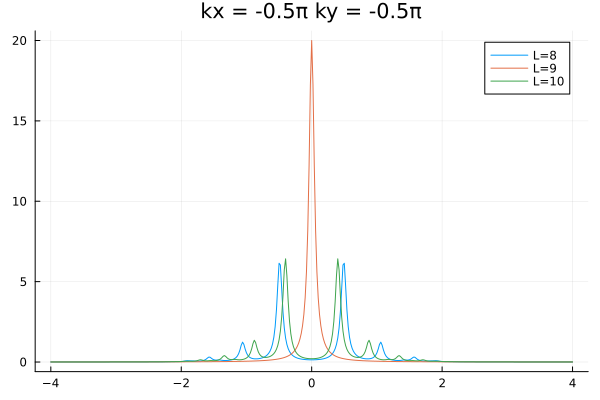

In [35]:
include("subfun.jl")
using Printf
using Plots

# closeall()
plot()
for L in 8:10
Lx = L
Ly = L
N = Lx*Ly

U = zeros(ComplexF64,N,N)
H = getH(pi,Lx,Ly,false,false)

for kx in 1:Lx
    for ky in 1:Ly
        U[:,mapto1D(kx,ky)] = fftvector(kx*2*pi/Lx,ky*2*pi/Ly,Lx,Ly)
    end
end

# Hk = conj(transpose(U))*H*U

w = 0
eta = 0.05

Ens, evs = eigen(H)

# eA = Diagonal(1 ./((w+1im*eta).-Ens))
# G = evs*(eA*transpose(conj(evs)));
# heatmap(-reshape(diag(imag(G)),Lx,Ly))

ws = -4:0.02:4
A = zeros(size(ws))

kx = -0.5
ky = -0.5
for n in 1:size(ws,1)
    # @show n
    w = ws[n]
    # eA = Diagonal(1 ./((w+1im*eta).-Ens))
    # G = evs*(eA*transpose(conj(evs)))

    G = zeros(size(Ens,1),size(Ens,1))
    for ii in 1:size(Ens,1)
        G += evs[:,ii]*conj(transpose(evs[:,ii]))./((w+1im*eta)-Ens[ii])
    end
    # A[n] = imag( -conj(transpose(fftvector(pi/2,pi/2,Lx,Ly)))*G*fftvector(pi/2,pi/2,Lx,Ly) )
    # A[n] = imag( -conj(transpose(fftvector(-0.6*pi,-0.6*pi,Lx,Ly)))*G*fftvector(-0.6*pi,-0.6*pi,Lx,Ly) )
    A[n] = imag( -conj(transpose(fftvector(kx*pi,ky*pi,Lx,Ly, pbc=false)))* G *fftvector(kx*pi,ky*pi,Lx,Ly,pbc=false) )
    # A[n] = imag( -(transpose(fftvector(kx*pi,ky*pi,Lx,Ly)))* G * conj(fftvector(kx*pi,ky*pi,Lx,Ly)) )
end
# @show size(fftvector(kx,ky,Lx,Ly))
plot!(ws,A,label = "L="*string(L))
# legend!("L="*string(L))
# title!("kx =%.1f ky = %.1f"%(kx,ky))
end
title!(@sprintf("kx = %.1fπ ky = %.1fπ", kx, ky))
# # @show A

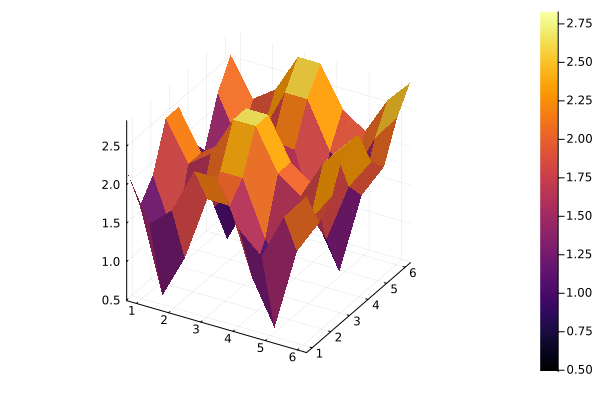

In [9]:
using Plots
function meshgrid(x, y)
    X = [i for i in x, j in y]
    Y = [j for i in x, j in y]
    return X, Y
end
Lx = 9
Ly = 9
# kx = (1:Lx)*pi/(Lx+1)
# ky = (1:Ly)*pi/(Ly+1)
kx = (1:Lx)*2*pi/(Lx)
ky = (1:Ly)*2*pi/(Ly)
kx,ky = meshgrid(kx,ky)
# sort(reshape(2*sqrt.(cos.(kx).^2+cos.(ky).^2),Lx*Ly))
surface(kx,ky,2*sqrt.(cos.(kx).^2+cos.(ky).^2))